# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker import plot_maker_3d

## 2. Importing Data

In [2]:
# get all the red ball data
X_rec1 = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h22m.csv', decimal='.', delimiter=',')
X_rec2 = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h23m.csv', decimal='.', delimiter=',')
X_rec3 = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h25m.csv', decimal='.', delimiter=',')
X_rec4 = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h27m.csv', decimal='.', delimiter=',')
X_rec5 = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h30m.csv', decimal='.', delimiter=',')
X_rec6 = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h31m.csv', decimal='.', delimiter=',')

In [3]:
# get all the positions data
y_rec1 = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h22m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec2 = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h23m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec3 = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h25m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec4 = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h27m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec5 = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h30m.csv', decimal='.', delimiter=',').iloc[:-2]
y_rec6 = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h31m.csv', decimal='.', delimiter=',').iloc[:-2]

In [4]:
(X_rec1.shape, y_rec1.shape), (X_rec2.shape, y_rec2.shape), (X_rec3.shape, y_rec3.shape), (X_rec4.shape, y_rec4.shape), (X_rec5.shape, y_rec5.shape), (X_rec6.shape, y_rec6.shape)

(((821, 18), (821, 3)),
 ((810, 18), (810, 3)),
 ((813, 18), (813, 3)),
 ((201, 18), (201, 3)),
 ((809, 18), (809, 3)),
 ((808, 18), (808, 3)))

In [5]:
print(f"The amount of NaN in rec1: {X_rec1.isna().sum().sum()}")
print(f"The amount of NaN in rec2: {X_rec2.isna().sum().sum()}")
print(f"The amount of NaN in rec3: {X_rec3.isna().sum().sum()}")
print(f"The amount of NaN in rec4: {X_rec4.isna().sum().sum()}")
print(f"The amount of NaN in rec5: {X_rec5.isna().sum().sum()}")
print(f"The amount of NaN in rec6: {X_rec6.isna().sum().sum()}")

The amount of NaN in rec1: 1740
The amount of NaN in rec2: 776
The amount of NaN in rec3: 4
The amount of NaN in rec4: 20
The amount of NaN in rec5: 470
The amount of NaN in rec6: 2


Rec7 and Rec8 have too many NaNs

### 2.3 Combine all the datasets

In [6]:
X_train = pd.concat([X_rec1, X_rec2,X_rec3, X_rec4, X_rec5, X_rec6])
y_train = pd.concat([y_rec1, y_rec2,y_rec3,y_rec4,y_rec5,y_rec6])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [7]:
X_train.isna().sum()

u0    296
v0    296
u1     74
v1     74
u2    305
v2    305
u3     66
v3     66
u4    135
v4    135
u5    305
v5    305
u6    123
v6    123
u7    129
v7    129
u8     73
v8     73
dtype: int64

In [8]:
X_train.shape, y_train.shape

((4262, 18), (4262, 3))

In [9]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [10]:
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,...,v5,u6,v6,u7,v7,u8,v8,x,y,z
0,42.0,53.0,104.5,52.5,42.0,66.0,84.0,67.0,NaN,NaN,...,78.5,NaN,NaN,NaN,NaN,105.5,79.5,2.947180,3.229958,23.52337
1,42.5,52.5,104.5,52.5,41.5,66.0,83.0,66.0,NaN,NaN,...,78.5,NaN,NaN,NaN,NaN,106.0,79.0,2.963082,3.358113,23.66638
2,40.5,52.5,102.5,51.0,40.0,65.0,83.5,65.5,NaN,NaN,...,78.0,NaN,NaN,NaN,NaN,103.0,78.5,3.105975,3.135756,23.47686
3,37.5,50.5,100.0,51.0,NaN,NaN,NaN,NaN,125.5,63.5,...,77.0,125.5,78.5,126.0,50.0,99.5,77.5,3.456995,3.061499,23.26819
4,34.0,51.0,96.5,50.5,35.0,64.5,77.0,65.5,124.0,64.0,...,77.0,122.0,79.0,122.0,50.0,97.0,77.0,3.947670,2.944803,23.34910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,14.0,41.0,77.5,43.5,14.0,55.0,58.0,57.0,101.5,55.5,...,69.0,101.0,68.0,101.0,42.0,78.0,68.0,7.546328,1.569411,24.56239
4258,15.5,42.0,78.0,43.0,15.0,56.0,59.0,56.0,102.0,56.0,...,69.0,102.0,69.0,102.0,42.5,78.5,68.5,7.372911,1.581999,24.56596
4259,16.0,42.0,80.0,44.0,16.0,56.0,60.0,57.0,104.0,56.0,...,70.0,104.0,70.0,103.0,43.0,79.5,69.5,7.202659,1.641818,24.52438
4260,17.0,43.0,80.0,44.5,17.0,57.0,62.0,58.0,105.0,57.0,...,71.0,104.0,70.0,104.0,44.0,81.0,70.0,7.044904,1.746940,24.43953


In [11]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isnull().sum().sum()}')

The data has missing values: 3012
The data has missing values: 0


In [12]:
X = combined.iloc[:, :18]
y = combined.iloc[:, 18:]


In [13]:
X.shape, y.shape

((3872, 18), (3872, 3))

In [14]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [15]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [16]:
# Best parameters: {'mlp__solver': 'sgd', 'mlp__max_iter': 20000, 'mlp__learning_rate_init': 0.1, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50) # ,(100,), (64, 32, 64)],
         ],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_scaled, y_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\xande\venv\lib\site-

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('mlp',
                                              MLPRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'mlp__activation': ['identity', 'tanh',
                                                            'relu'],
                                        'mlp__alpha': [0.001, 0.01, 0.1],
                                        'mlp__early_stopping': [True],
                                        'mlp__hidden_layer_sizes': [(50, 100,
                                                                     50)],
                                        'mlp__learning_rate': ['constant',
                                                               'adaptive'],
                                        'mlp__learning_rate_init': [0.001, 0.01,
                                                                    0.1],
                                        'mlp__max_iter': [10000, 20000, 28000],
                                        'mlp__solver': ['sgd', 'adam']},
                   random_state=42, verbose=3)

In [17]:
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

Best parameters: {'mlp__solver': 'sgd', 'mlp__max_iter': 20000, 'mlp__learning_rate_init': 0.1, 'mlp__learning_rate': 'adaptive', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.01, 'mlp__activation': 'relu'}
Best score: 0.860501840113874


In [18]:
model = random_search.best_estimator_

## 5. Training the Model

In [19]:
model.fit(X_scaled, y_scaled)

Pipeline(steps=[('mlp',
                 MLPRegressor(alpha=0.01, early_stopping=True,
                              hidden_layer_sizes=(50, 100, 50),
                              learning_rate='adaptive', learning_rate_init=0.1,
                              max_iter=20000, random_state=42, solver='sgd'))])

## 6. Make Predictions On Test Data

In [1]:
import pandas as pd

In [4]:
X_test_8_a = pd.read_csv('../data-9-cams/red_ball_coordinates_128px_2024-03-19_15h33m.csv', decimal='.', delimiter=',')

In [5]:
y_test_8_a = pd.read_csv('../data-9-cams/positions_xyz_2024-03-19_15h33m.csv', decimal='.', delimiter=',').iloc[:-4]
(X_test_8_a.shape, y_test_8_a.shape)

((407, 18), (407, 3))

In [23]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :18]
    y_val = combined_test.iloc[:, 18:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [24]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

Mean Squared Error on Test Data Set: 0.1621668560926619
Mean Absolute Error on Test Data Set: 0.29209737540006403
R2 Score on Test Data set: 0.8932002553493059


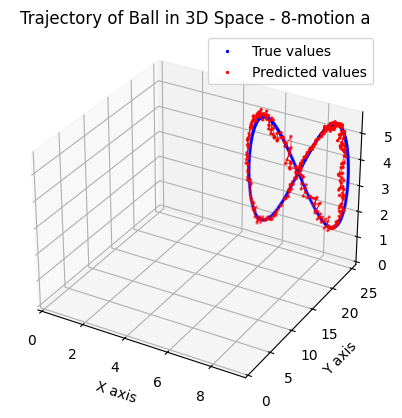

In [30]:
X_test_8_scaled_a, y_test_8_a = prepare_and_scale_test_data(X_test_8_a, y_test_8_a, scaler_x)
X_test_8_pred_a, mse_8_a, mae_8_a, r2_8_a = predict_evaluate_plot(X_test_8_scaled_a, y_test_8_a, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion a')
y_test_pred_8_a_scaled = model.predict(X_test_8_scaled_a)
y_test_8_a_pred = scaler_y.inverse_transform(y_test_pred_8_a_scaled)